# 0 - Importando Bibliotecas

In [733]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [734]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Sumario

- Age - Idade dos pesquisados
- Sex: Sexo [M: Homem , F: Mulher]
- ChestPainType: Tipo de dor no peito [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: Pressão sanguineia em repouso
- Cholesterol: cholesterol [mm/dl]
- FastingBS: glicemia em jejum [1: se BS em jejum > 120 mg/dl, 0: caso contrário]
- RestingECG: eletrocardiograma em repouso [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: frequência cardíaca máxima alcançada [Valor numérico entre 60 e 202]
- ExerciseAngina: angina induzida por exercício [S: Sim, N: Não]
- Oldpeak: oldpeak = ST [Valor numérico medido em depressão]
- ST_Slope: a inclinação do pico do segmento ST do exercício [Para cima: ascendente, Plano: plano, Para baixo: descendente]
- {Target} HeartDisease: Doença Cardiaca [1: heart disease, 0: Normal] 

# 0 - Entendendo meus dados

In [735]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [737]:
df.duplicated().sum()

np.int64(0)

In [738]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# 2-  Entendendo Variáveis (Análise Univariada)

In [739]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [740]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Entendendo variaveis númericas
- obs. Nota-se um desbalancemento na variavel 'FastingBS', 'FastingBS' e presença de outliers na varivel 'Cholesterol'

In [741]:
plt.show()
colunas_numericas = []
for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]):
        colunas_numericas.append(c)


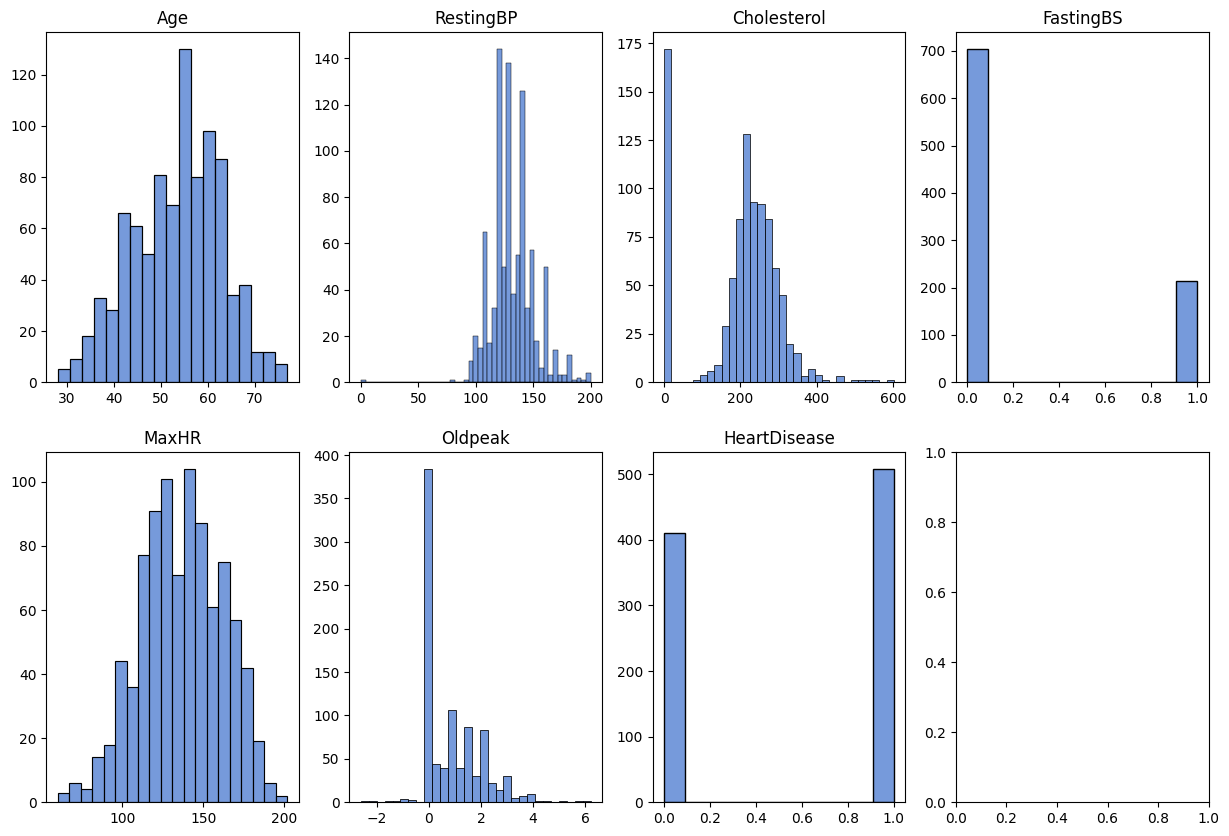

<Figure size 700x400 with 0 Axes>

In [742]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))  
plt.figure(figsize=(7,4))
axes = axes.flatten()  
for i,c in enumerate(colunas_numericas):
    sns.histplot(x=df[c],ax=axes[i])
    axes[i].set_title(c)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')


plt.show()

Entendendo colunas nominais
- Obs. Existe desbalançeamento nas variaveis, 'Sex', 'ChestPainYpe', 'ST_Slope'

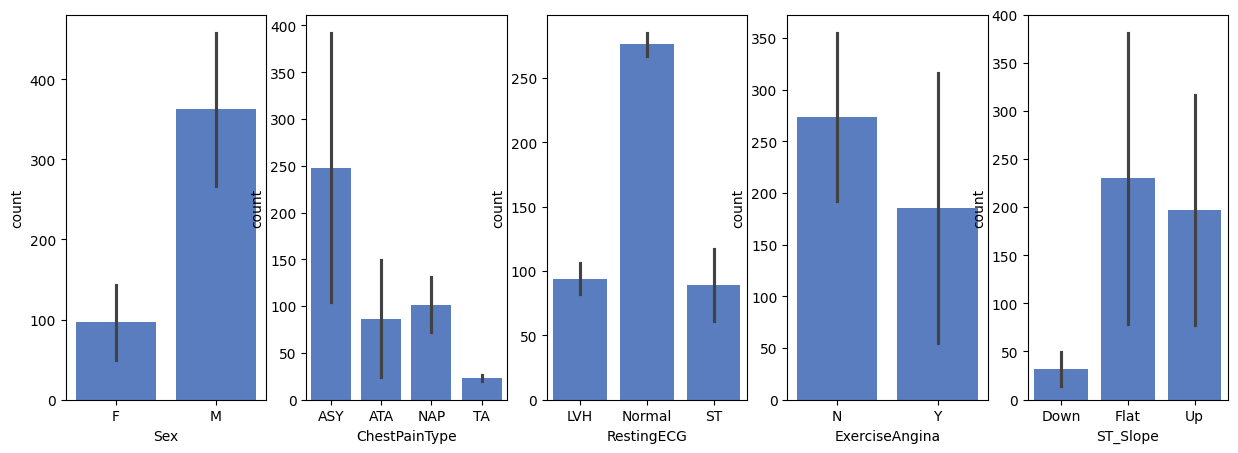

In [743]:
c=['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
fig, axes = plt.subplots(1, len(c), figsize=(15, 5)) 
for i,v in enumerate(c):
     grafico = df.groupby([v, 'HeartDisease']).size().reset_index(name='count')
     sns.barplot(data=grafico, x=v, y='count',  ax=axes[i])
plt.show()


# 3- Explorando meus dados
# Baseado na interplretação das variaveis feita acima, buscaremos respostas para as seguintes perguntas:

##### Idade e risco: Existe uma relação entre a idade dos pesquisados e a presença de doença cardíaca? Pessoas mais velhas têm maior risco?
- Sim, apartir dos 45 anos o número de pesquisados que tem doença cardiaca tem um forte aumento percentual em relação aos que não possuem.
##### Dor no peito: Qual tipo de dor no peito (ChestPainType) é mais comum em pacientes com doença cardíaca?
- O tipo de dor no peito que mais custuma apresentar sinais de doença, e a ASY (Onde a maior parte apresenta a doença), e a TA (Que possui um forte indicativo para a doença), Ps. Significado das abreviações no sumario
##### Pressão e colesterol: Pessoas com pressão sanguínea elevada (RestingBP) ou colesterol alto (Cholesterol) apresentam mais casos de doença cardíaca?
- Em relção a 'RestingBP', e evidente que quanto maior a pressão sanguinea em repouso, maior as chances de doença, já em colestorol nota-se que valores muito maiores/menores em relação a media, indicam presença de doença
##### Angina induzida por exercício: A angina induzida por exercício (ExerciseAngina) está fortemente associada à presença de doença cardíaca?
- O grupo com presença de Angina está fortemente relacionado com doenças cardiacas, um aumento de 50% em relação as que apresentam ausencia da mesma
##### Eletrocardiograma: Certos padrões no eletrocardiograma (RestingECG) indicam maior risco de doença cardíaca?
- Sim, Padroes como LVH / ST Idicam maior propenção a doença

In [744]:
#Para responder a primeira pergunta iremos agrupar por faixa de idades, para melhor vizualização
df['Age'] = pd.cut(df['Age'], 
                   bins=[20, 35, 45, 55, 65, 70, 80], 
                   labels=['20-35', '36-45', '46-55', '56-65', '66-70', '71-80'])

C:\Users\andre\AppData\Local\Temp\ipykernel_13804\756294556.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  j = df.groupby(['Age','HeartDisease'])['HeartDisease'].size().reset_index(name='Frequencia')


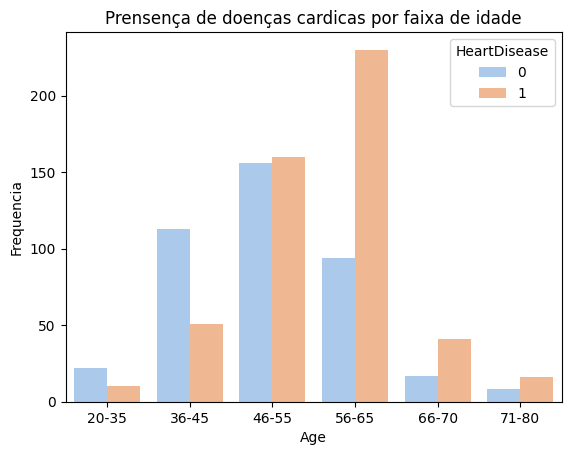

In [745]:
j = df.groupby(['Age','HeartDisease'])['HeartDisease'].size().reset_index(name='Frequencia')
sns.barplot(x='Age', y='Frequencia', hue='HeartDisease', data=j,palette='pastel')
plt.title('Prensença de doenças cardicas por faixa de idade')
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_13804\2833972394.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['ChestPainType'] == c], x='HeartDisease', ax=axes[i], palette='colorblind')
C:\Users\andre\AppData\Local\Temp\ipykernel_13804\2833972394.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['ChestPainType'] == c], x='HeartDisease', ax=axes[i], palette='colorblind')
C:\Users\andre\AppData\Local\Temp\ipykernel_13804\2833972394.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['ChestPainType'] 

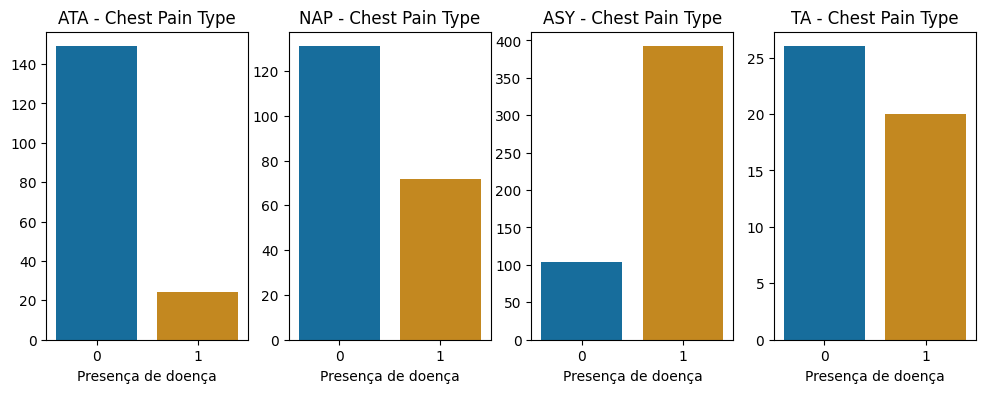

In [746]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))  
axes = axes.flatten()  
tipos = df.ChestPainType.unique()

for i, c in enumerate(tipos):
    # Utilizando o boxplot para visualização (ou countplot, dependendo do seu objetivo)
    sns.countplot(data=df[df['ChestPainType'] == c], x='HeartDisease', ax=axes[i], palette='colorblind')
    axes[i].set_title(f'{c} - Chest Pain Type')
    axes[i].set_xlabel('Presença de doença')
    axes[i].set_ylabel('')
plt.show()



C:\Users\andre\AppData\Local\Temp\ipykernel_13804\3063289380.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease',y=c, data=j,ax=axes[i],palette='pastel')
C:\Users\andre\AppData\Local\Temp\ipykernel_13804\3063289380.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease',y=c, data=j,ax=axes[i],palette='pastel')


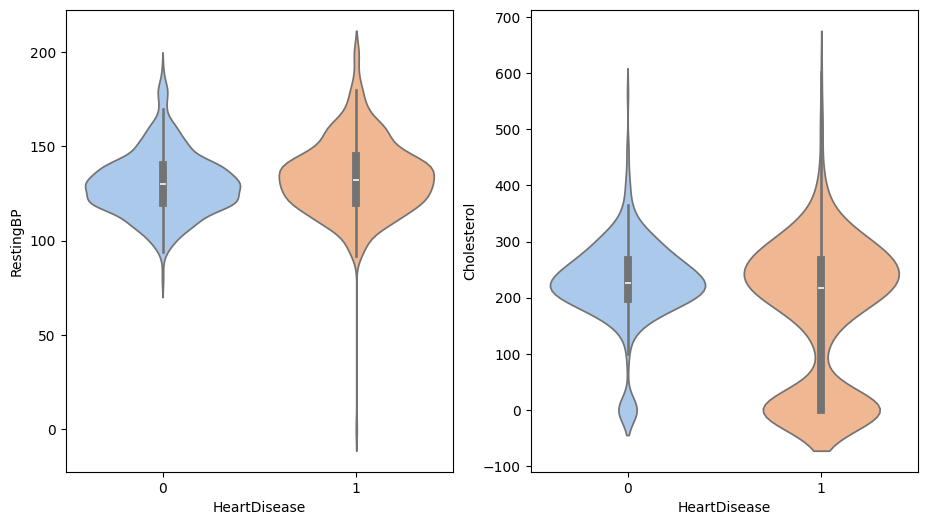

In [747]:
j = df[['RestingBP', 'Cholesterol','HeartDisease']]
fig, axes = plt.subplots(ncols= 2,nrows =1,figsize=(11, 6))
axes = axes.flatten()  
colunas  = ['RestingBP', 'Cholesterol']
for i,c in enumerate(colunas):
    sns.violinplot(x='HeartDisease',y=c, data=j,ax=axes[i],palette='pastel')
plt.show()


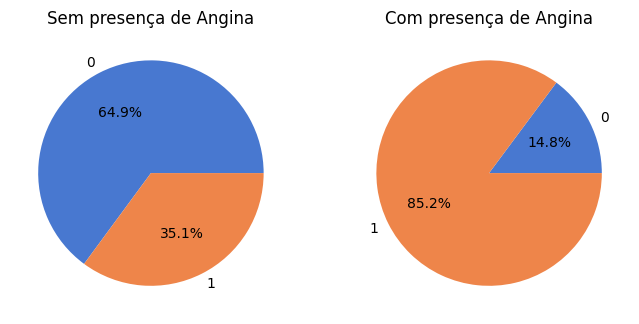

,ExerciseAngina,HeartDisease,frequencia
0,N,0,355
1,N,1,192
2,Y,0,55
3,Y,1,316


In [748]:
j = df.groupby(['ExerciseAngina','HeartDisease']).size().reset_index(name='frequencia')
sns.set_palette("muted") 
fig, axes = plt.subplots(ncols= 2,nrows =1,figsize=(8, 5))
axes[0].pie(j[j['ExerciseAngina']=='N']['frequencia'],labels=j[j['ExerciseAngina']=='N']['HeartDisease'], autopct='%1.1f%%')
axes[0].set_title('Sem presença de Angina')
axes[1].pie(j[j['ExerciseAngina']=='Y']['frequencia'],labels=j[j['ExerciseAngina']=='Y']['HeartDisease'], autopct='%1.1f%%')
axes[1].set_title('Com presença de Angina')
plt.show()
j

C:\Users\andre\AppData\Local\Temp\ipykernel_13804\172264742.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=j[j['RestingECG'] == c], x='HeartDisease',y='qnt', ax=axes[i], palette='colorblind')
C:\Users\andre\AppData\Local\Temp\ipykernel_13804\172264742.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=j[j['RestingECG'] == c], x='HeartDisease',y='qnt', ax=axes[i], palette='colorblind')
C:\Users\andre\AppData\Local\Temp\ipykernel_13804\172264742.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=j[j['RestingECG'] == c]

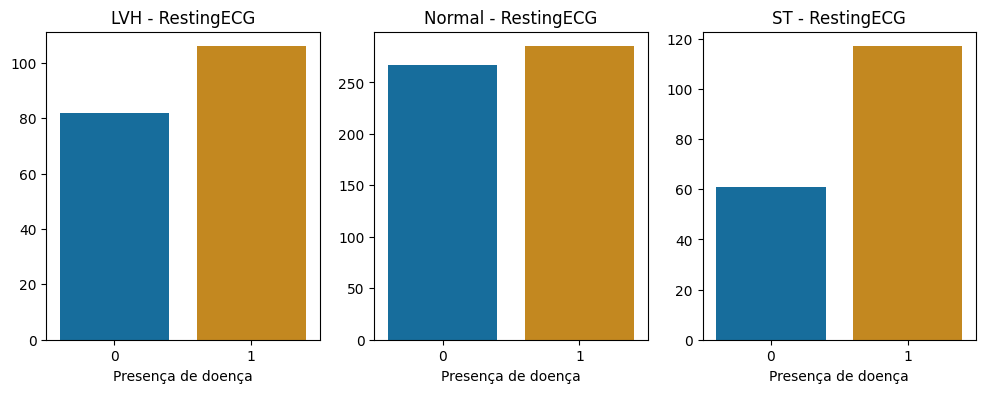

In [749]:
j = df.groupby(['RestingECG','HeartDisease']).size().reset_index(name='qnt')
j

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  
axes = axes.flatten()  
tipos = j.RestingECG.unique()

for i, c in enumerate(tipos):
    # Filtrando o DataFrame por tipo de RestingECG
    sns.barplot(data=j[j['RestingECG'] == c], x='HeartDisease',y='qnt', ax=axes[i], palette='colorblind')
    axes[i].set_xlabel('Presença de doença')
    axes[i].set_ylabel('')
    axes[i].set_title(f'{c} - RestingECG')  # Título com o tipo de RestingECG
plt.show()


In [750]:
df.HeartDisease

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

# 4- Preparando os dados para o modelo de Machine Learn

In [751]:
c = ['ChestPainType','RestingECG','ST_Slope']
for j in c:
    coluna_para_concat = pd.get_dummies(df[j],prefix=j).astype(int)
    df = pd.concat([df,coluna_para_concat],axis=1)
    df.drop(j,axis=1,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                918 non-null    category
 1   Sex                918 non-null    object  
 2   RestingBP          918 non-null    int64   
 3   Cholesterol        918 non-null    int64   
 4   FastingBS          918 non-null    int64   
 5   MaxHR              918 non-null    int64   
 6   ExerciseAngina     918 non-null    object  
 7   Oldpeak            918 non-null    float64 
 8   HeartDisease       918 non-null    int64   
 9   ChestPainType_ASY  918 non-null    int64   
 10  ChestPainType_ATA  918 non-null    int64   
 11  ChestPainType_NAP  918 non-null    int64   
 12  ChestPainType_TA   918 non-null    int64   
 13  RestingECG_LVH     918 non-null    int64   
 14  RestingECG_Normal  918 non-null    int64   
 15  RestingECG_ST      918 non-null    int64   
 16  ST_Slope

In [752]:
c = ['Sex','Age','ExerciseAngina']
for j in c:
    df[j] = df[j].astype('category').cat.codes.astype(int)

<Axes: >

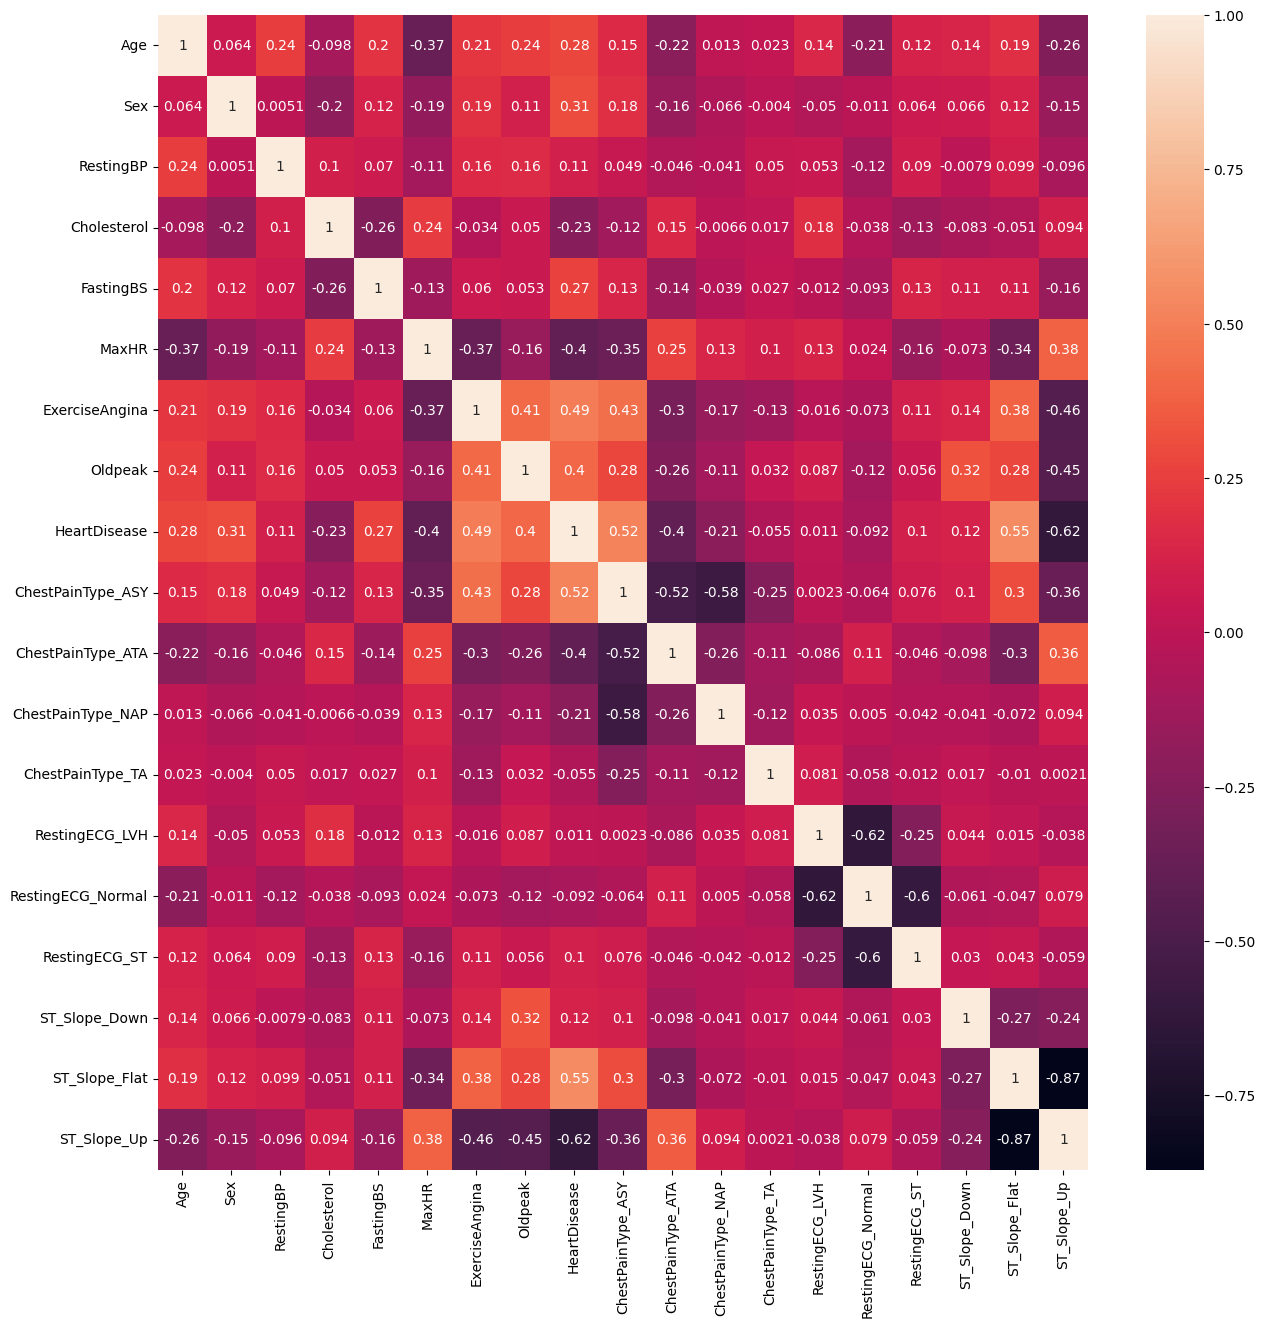

In [753]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [754]:
from sklearn.model_selection import train_test_split
X = df.drop('HeartDisease',axis=1)
y = df.HeartDisease

<Axes: ylabel='count'>

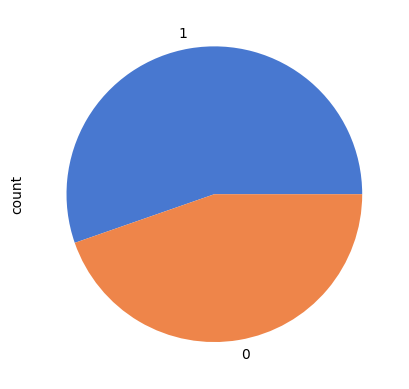

In [755]:
y.value_counts().plot(kind='pie')

In [756]:
for j in c:
    X.drop(j,axis=1,inplace=True)

x_train,x_test,y_train,y_test = train_test_split(X,y , test_size=0.2, stratify=y,random_state=0)

In [758]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0, max_depth=20,n_estimators=20)
model.fit(x_train,y_train)
model.score(x_test,y_test)
y_pred = model.predict(x_test)

In [762]:
from sklearn.metrics import classification_report

# Gerando o relatório de classificação diretamente
report = classification_report(y_test, y_pred)

# Exibindo o relatório
print(report)


              precision    recall  f1-score   support

           0       0.84      0.90      0.87        82
           1       0.92      0.86      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



<Axes: >

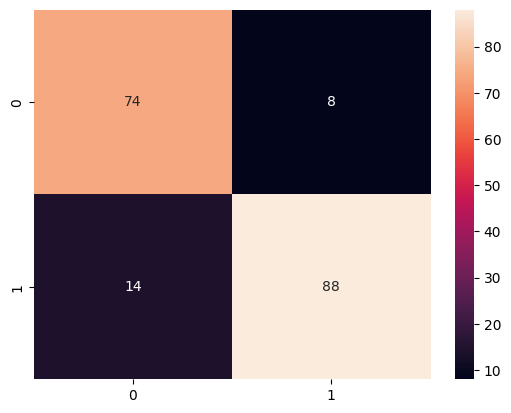

In [764]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)